In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import altair as alt
from vega_datasets import data

warnings.filterwarnings("ignore") # mutes all the warnings

In [2]:
# Reading the file

df = pd.read_csv('Candy_Data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
# Getting the summary of existing data

desc = df.describe()
np.round(desc, decimals=2)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,0.44,0.45,0.16,0.16,0.08,0.08,0.18,0.25,0.52,0.48,0.47,50.32
std,0.50,0.50,0.37,0.37,0.28,0.28,0.38,0.43,0.50,0.28,0.29,14.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,22.45
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.26,39.14
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.46,0.46,47.83
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.65,59.86
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,84.18


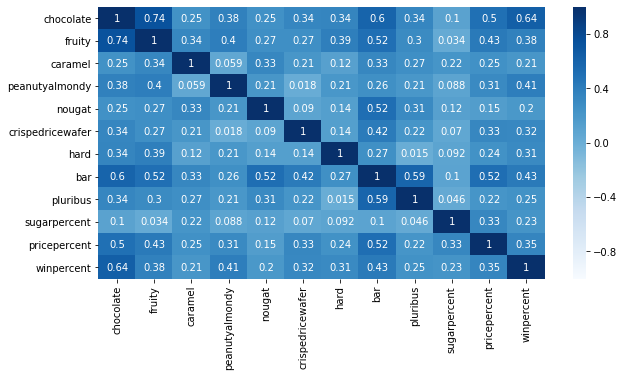

In [4]:
# Heatmap to check the correlation between each ingredient

plt.figure(figsize=(10,5))
sns.heatmap(df.corr().abs(), vmin = -1,annot=True, cmap ='Blues')

In [5]:
# Enables Rendering feature of Altair library

alt.renderers.enable('notebook', embed_options={'actions': False})

RendererRegistry.enable('notebook')

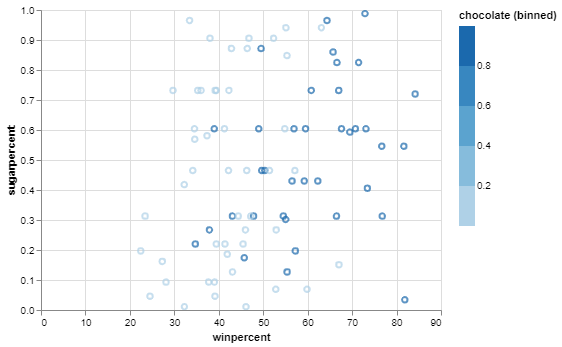

In [6]:
# Relationship between sugar and win percent per competitor using chocolate as ingredient

alt.Chart(df).mark_point().encode(
    x=('winpercent:Q'),
    y=('sugarpercent:Q'),
    color=alt.Color('chocolate:Q', bin=alt.Bin(maxbins=5))).interactive()

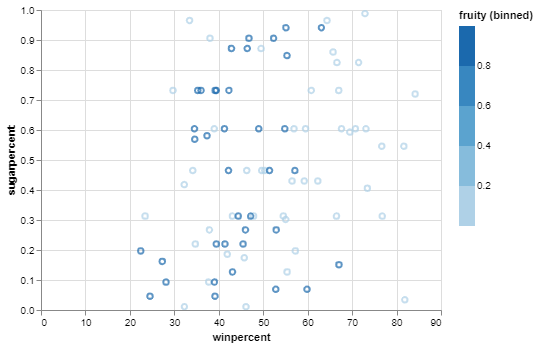

In [7]:
# Relationship between sugar and win percent per competitor using fruits as ingredient

alt.Chart(df).mark_point().encode(
    x=('winpercent:Q'),
    y=('sugarpercent:Q'),
    color=alt.Color('fruity:Q', bin=alt.Bin(maxbins=5))).interactive()

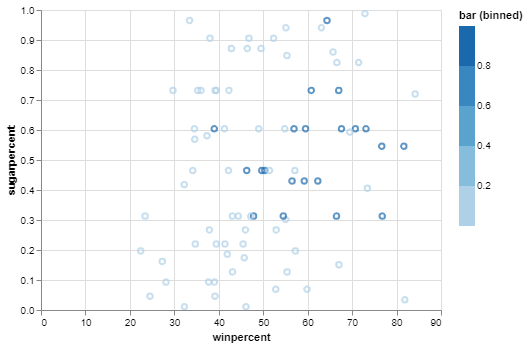

In [8]:
# Relationship between sugar and win percent per competitor using bar as the type of candy

alt.Chart(df).mark_point().encode(
    x=('winpercent:Q'),
    y=('sugarpercent:Q'),
    color=alt.Color('bar:Q', bin=alt.Bin(maxbins=5))).interactive()

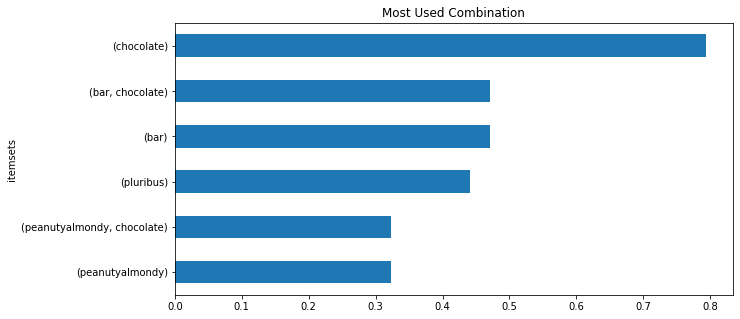

In [9]:
# highly winnable pairings

winners = df[df.winpercent>df.winpercent.quantile(.6)]

from mlxtend.frequent_patterns import apriori
df =  winners[df.columns[1:-3]]
association = apriori(df, min_support=0.3,use_colnames=True).sort_values(by='support')

association.plot(kind='barh',x='itemsets',y='support',title=f'Most Used Combination',sort_columns=True,figsize = (10,5),legend=False)

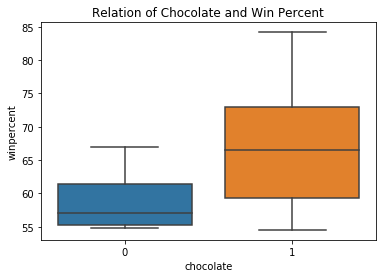

In [10]:
# checking how important chocolate is

sns.boxplot(x="chocolate", y="winpercent", data=winners).set_title('Relation of Chocolate and Win Percent');

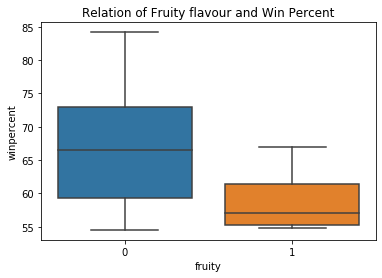

In [11]:
# checking the importance of fruity flavour

sns.boxplot(x="fruity", y="winpercent", data=winners).set_title('Relation of Fruity flavour and Win Percent');

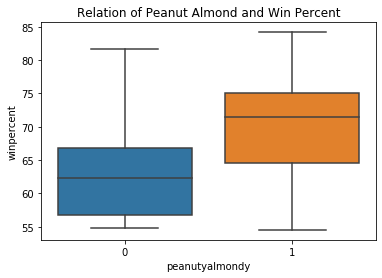

In [12]:
# checking how important peanut almond is

sns.boxplot(x="peanutyalmondy", y="winpercent", data=winners).set_title('Relation of Peanut Almond and Win Percent');

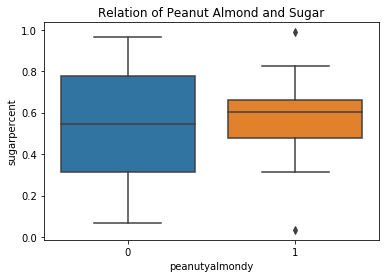

In [13]:
# checking how important is sugar quantity with peanut almond

sns.boxplot(x="peanutyalmondy", y="sugarpercent", data=winners).set_title('Relation of Peanut Almond and Sugar');

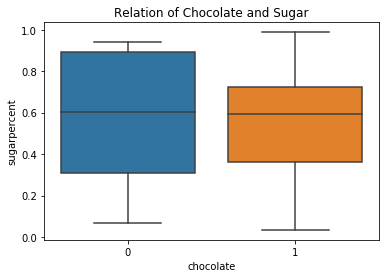

In [14]:
# checking how important is sugar quantity with chocolate

sns.boxplot(x="chocolate", y="sugarpercent", data=winners).set_title('Relation of Chocolate and Sugar');

In [15]:
from sklearn import linear_model
import pandas as pd

df = pd.read_csv("Candy_Data.csv")

reg = linear_model.LinearRegression()

X = df.drop(['competitorname','winpercent'], axis='columns')
y = df.winpercent

reg.fit(X, y)

'''LEGEND of the order of ingredients and candy type:
1.chocolate, 2.fruity, 3.caramel, 4.peanutyalmondy, 5.nougat, 6.crispedricewafer, 7.hard, 8.bar, 9.pluribus
10. sugar percent, 11. price percent'''

print("Win percent with chocolate and peanutalmondy in a nougat bar:",reg.predict([[1, 0, 0, 1, 1, 0, 0, 1, 0, .80, .40]]))
print ("win percent with chocolate, caramel, peanut almond with crisp rice wafer in nougat bar:",reg.predict([[1, 0, 1, 1, 0, 1, 0, 1, 0, .60, .45]]))
print("win percent with fruit, peanut almond in a nougat bar:",reg.predict([[0, 1, 0, 1, 1, 0, 0, 1, 0, .80, .40]]))
print ("Win percent with fruit, peanut almond in a hard bar:",reg.predict([[0, 1, 0, 1, 0, 0, 1, 1, 0, .90, .35]]))

Win percent with chocolate and peanutalmondy in a nougat bar: [70.49667027]
win percent with chocolate, caramel, peanut almond with crisp rice wafer in nougat bar: [78.7220202]
win percent with fruit, peanut almond in a nougat bar: [60.17092536]
Win percent with fruit, peanut almond in a hard bar: [54.40636262]


In [16]:
reg.fit(X, y)
i = 0

while i < len(X.columns):
    print(X.columns[i] + " reg coeff : " + str(reg.coef_[i]))
    i = i + 1

chocolate reg coeff : 19.748066977292016
fruity reg coeff : 9.422322066515902
caramel reg coeff : 2.224481364934587
peanutyalmondy reg coeff : 10.07068846664841
nougat reg coeff : 0.8043306027718092
crispedricewafer reg coeff : 8.918969809827129
hard reg coeff : -6.165326502166488
bar reg coeff : 0.44154009420599744
pluribus reg coeff : -0.8544995421467787
sugarpercent reg coeff : 9.086762861511087
pricepercent reg coeff : -5.9283614255458374
